### Read in and parse column headers

In [90]:
#read in and parse column headers
import pandas as pd
url='https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abalone=pd.read_csv(url,header=None)
abalone.columns=["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Encode for Sex

In [94]:
abalone['Sex'] = abalone['Sex'].map({'M': 2, 'F': 1, 'I':0})
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [59]:
sexes = pd.unique(abalone.Sex.values)
aba_data = {sex:abalone['Length'][abalone.Sex == sex] for sex in sexes}

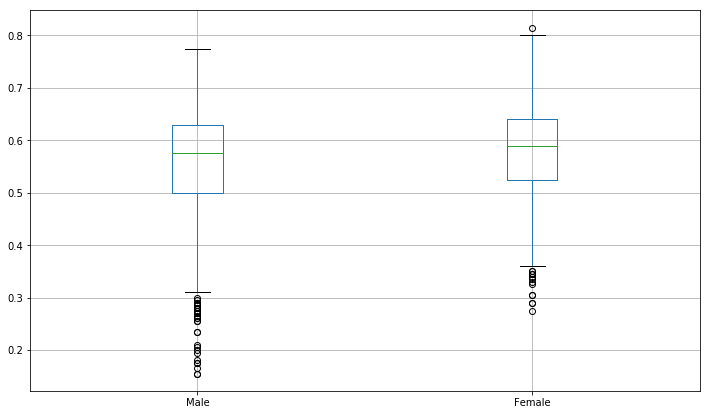

In [262]:
aba_df=pd.DataFrame({"Male":aba_data[2].tolist()[0:1307],"Female":aba_data[1].tolist()})
aba_df
# draw boxplot to show the shape of distribution
boxplot = aba_df.boxplot(column=['Male', 'Female'])

In [267]:
#calculate mean and std
sex_val = {'Male_mean': aba_data[2].mean(), 'Male_std': aba_data[2].std(),'Female_mean': aba_data[1].mean(), 'Female_std': aba_data[1].std()}
df = pd.DataFrame(data=sex_val,index=[0])
df.head()            

,Male_mean,Male_std,Female_mean,Female_std
0,0.561391,0.102697,0.579093,0.08616


In [263]:
# use Anova test to test for p value
f, p = stats.f_oneway(aba_data[2],aba_data[1])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  8.987874966189928e-07
reject null hypothesis


In [269]:
from scipy.stats import ttest_ind
# use T test to reprove the result
ttest,pval = ttest_ind(aba_data[2],aba_data[1])
print("p-value for significance is: ",pval)                       
#print(aba_data[2].mean(),aba_data[1].mean(),aba_data[2].std(),aba_data[1].std())                     
if pval < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

p-value for significance is:  8.987874966212848e-07
we reject null hypothesis


In [85]:
#calculate the mean rings of both
aba_rings = {sex:abalone['Rings'][abalone.Sex == sex] for sex in sexes}
aba_rings[1].median()

10.0

In [86]:
aba_rings[2].median()

10.0

In [87]:
aba_male=abalone[abalone['Sex']==2]
aba_female=abalone[abalone['Sex']==1]

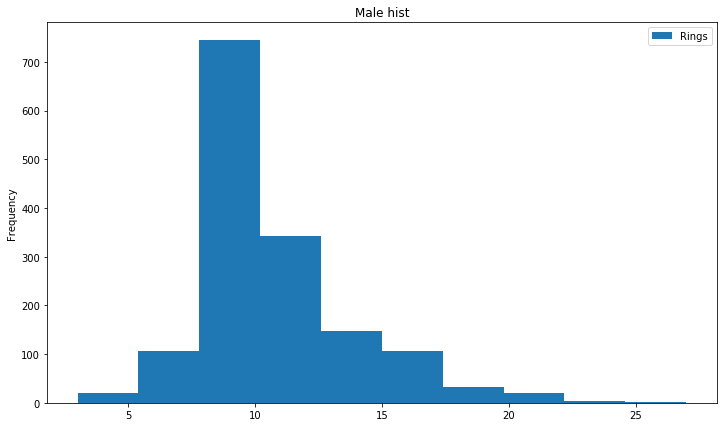

In [89]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,7)
aba_male["Rings"].plot(kind='hist', legend=True,title='Male hist')

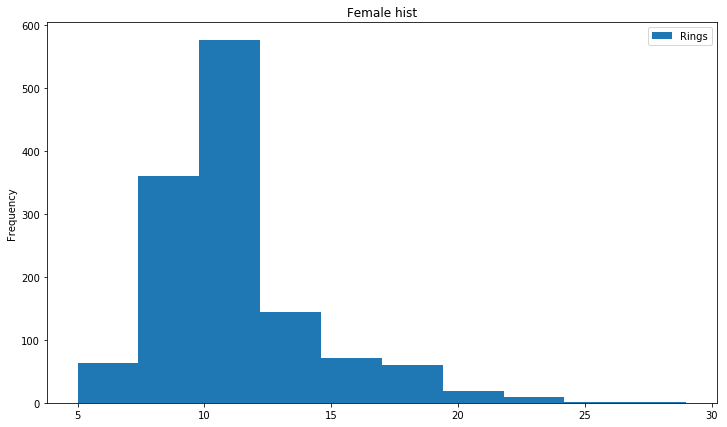

In [90]:
aba_female["Rings"].plot(kind='hist', legend=True,title='Female hist')

In [91]:
import scipy.stats as stats
u_statistic, pval = stats.mannwhitneyu(aba_male['Rings'], aba_female['Rings'])
print("P value is:",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

P value is: 6.689638084926974e-05
 we are rejecting null hypothesis


In [93]:
from scipy.stats import median_test
stat, p, med, tbl = median_test(aba_male['Rings'], aba_female['Rings'])
print("P value is:",p, "and the median is",med)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

P value is: 0.0032854772243561072 and the median is 10.0
 we are rejecting null hypothesis


### Conclusion 3
H0: When the rings of abalone is less than the median rings of infant, the abalone's length, height and weight are increasing when rings increase. When the rings of abalone is larger than the median rings of infant, the abalone's length, height and weight are less likely to increase with rings' increase.

Tool: seaborn, Pearsonr correlation coefficient

Necessary Numbers: Pearsonr, p-value

For Length(less than the median rings of infant): pearsonr=0.74 ; p=1.1e-243

For Length(larger than the median rings of infant): pearsonr=0.14; p=1.2e-13

For Height(less than the median rings of infant): pearsonr=0.54 ; p=3.2e-107

For Height(larger than the median rings of infant): pearsonr=0.27 ; p=5.6e-46

For Whole weight(less than the median rings of infant): pearsonr=0.62 ; p=4.1e-148

For Whole weight(larger than the median rings of infant): pearsonr=0.2 ; p=3e-26

Conclusion: Because the pearsonr of 'larger than the median rings of infant' are all larger than the one of 'less than the median rings of infant', and the low p-values show the reliability of these pearsonr results, we could not reject the H0. This conclusion could suggest that abalones grows (in length, height and weight) until a certain age (the median rings of infant), and after that, it's growth speed slow down dramatically.

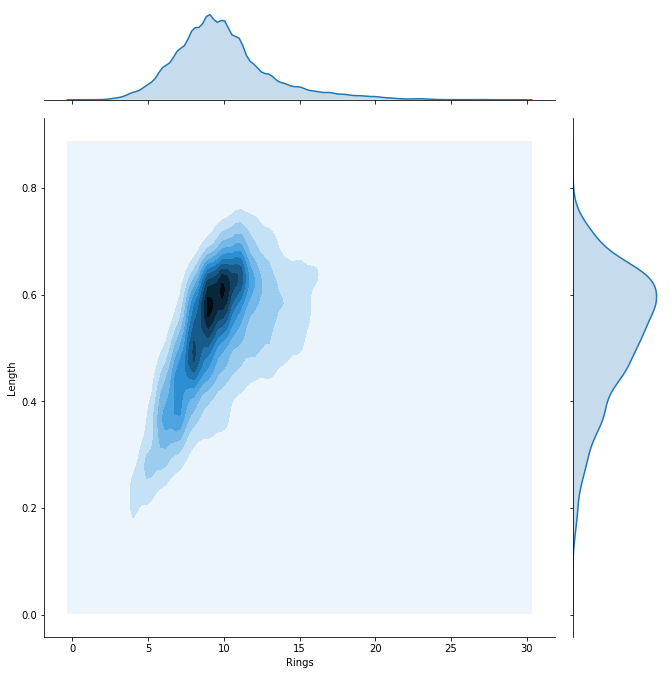

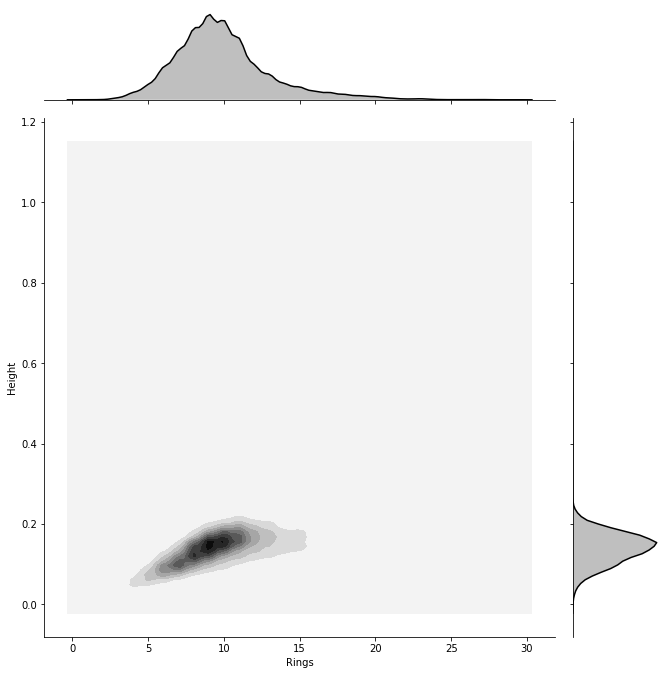

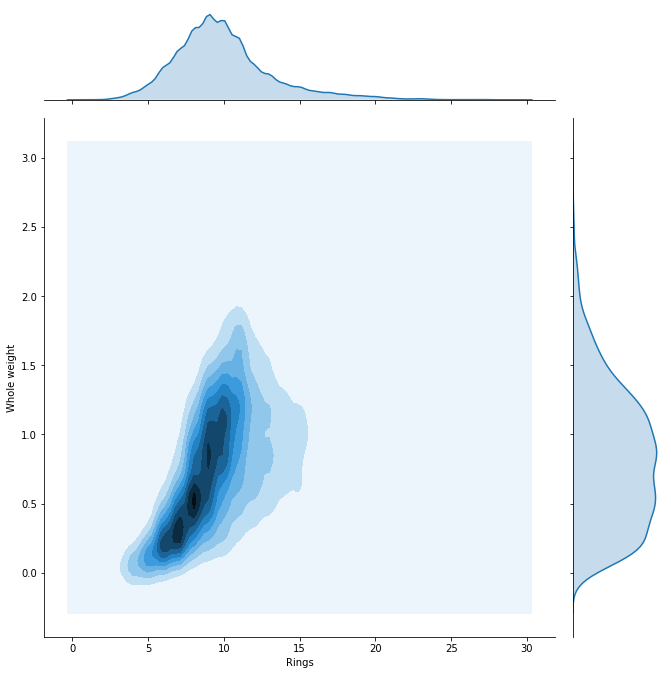

In [113]:
aba_sns = sns.jointplot(data=abalone, x='Rings', y='Length',kind='kde')
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)
aba_sns = sns.jointplot(data=abalone, x='Rings', y='Height', kind='kde',color='k')
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)
aba_sns = sns.jointplot(data=abalone, x='Rings', y='Whole weight', kind='kde')
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)

In [298]:
#calculate the median rings of infant
aba_rings = {sex:abalone['Rings'][abalone.Sex == sex] for sex in sexes}
aba_rings[0].median()

8.0

#### From these figures above, we can see that these three parameters all reach the largest number when rings around the median rings of infant. 

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


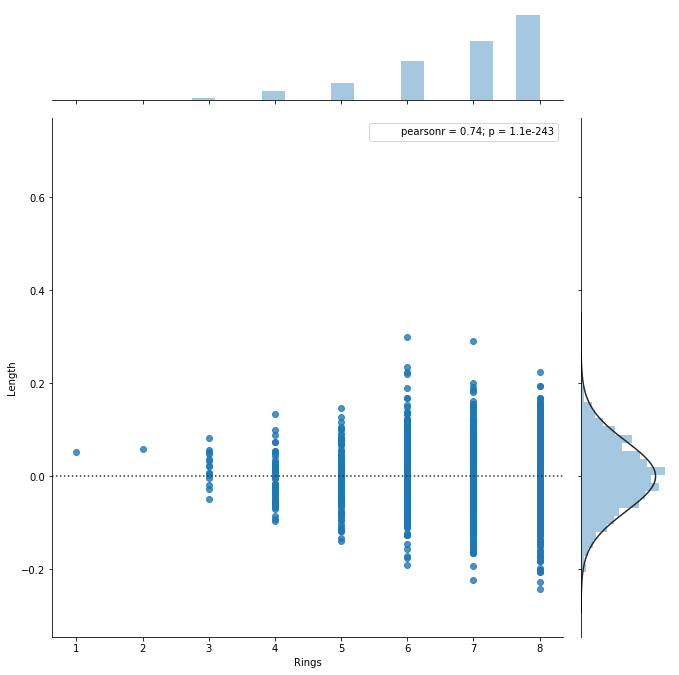

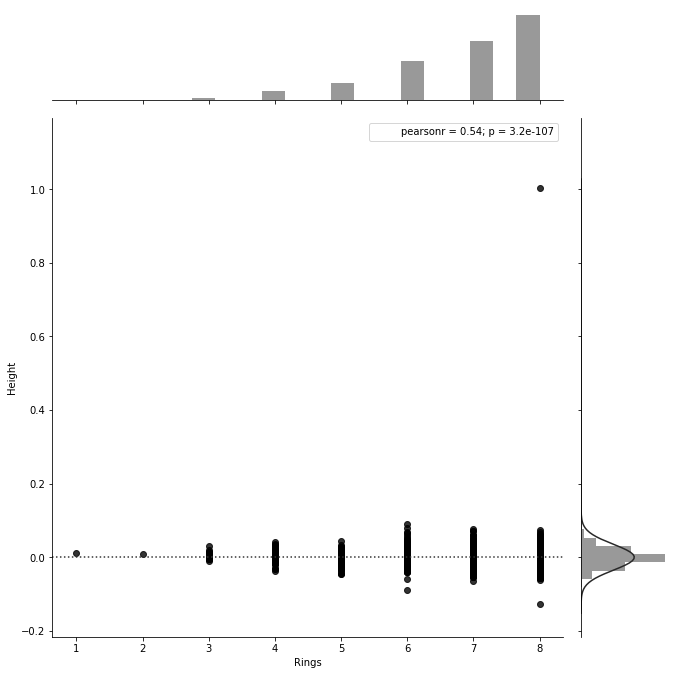

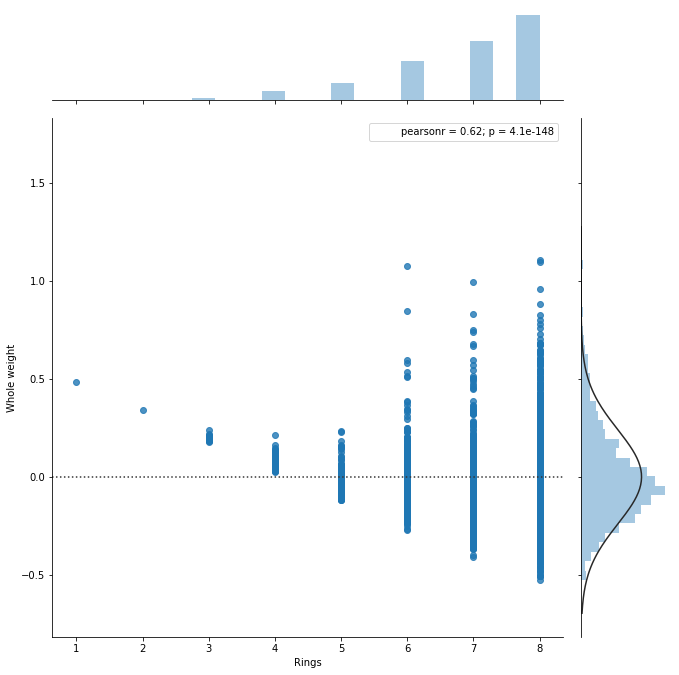

In [102]:
abalone_s = abalone[abalone['Rings'] <= aba_rings[0].median()]
aba_sns = sns.jointplot(data=abalone_s, x='Rings', y='Length',kind='resid')
aba_sns.annotate(stats.pearsonr)
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)
aba_sns = sns.jointplot(data=abalone_s, x='Rings', y='Height', kind='resid',color='k')
aba_sns.annotate(stats.pearsonr)
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)
aba_sns = sns.jointplot(data=abalone_s, x='Rings', y='Whole weight', kind='resid')
aba_sns.annotate(stats.pearsonr)
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


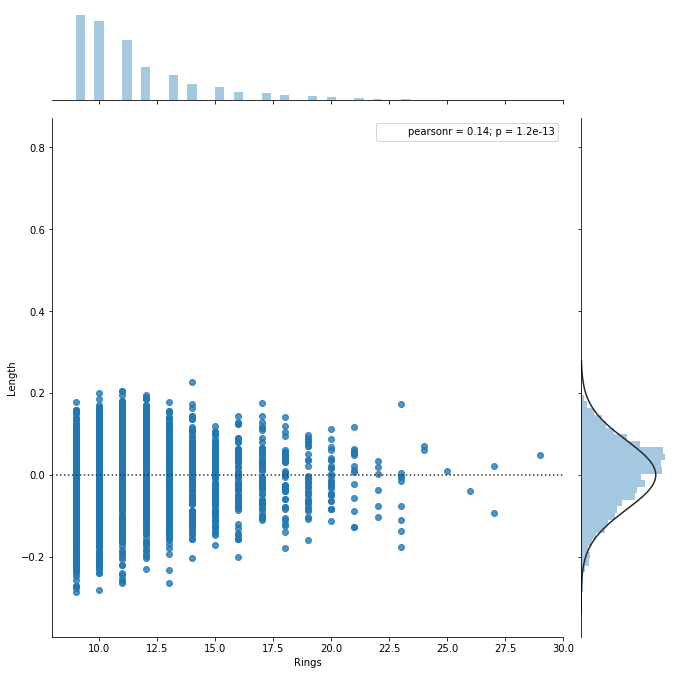

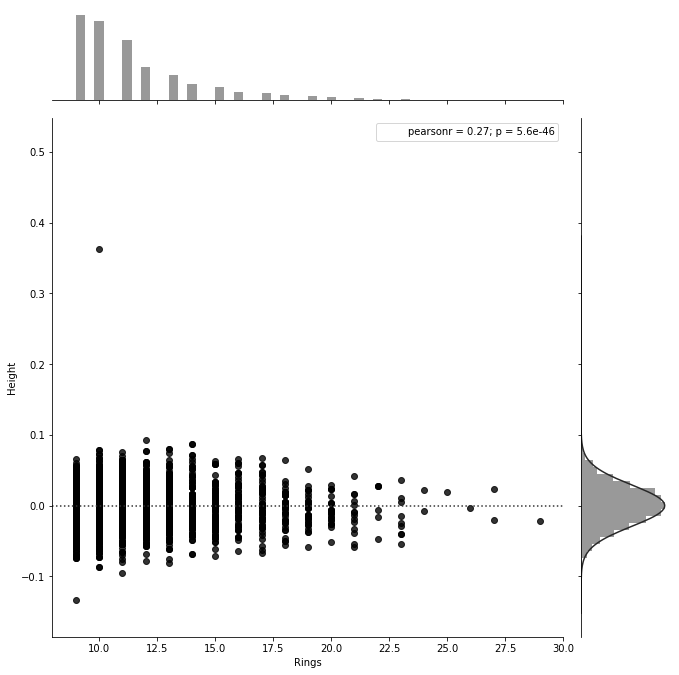

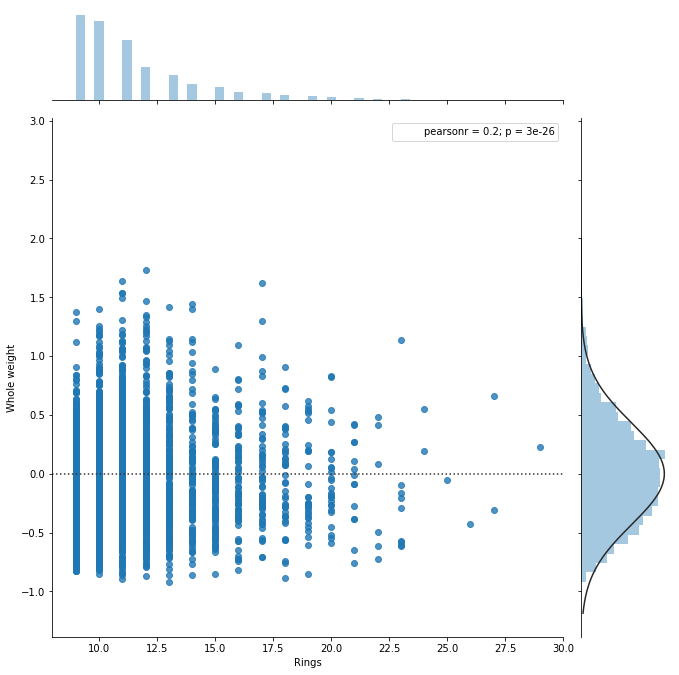

In [103]:
abalone_l = abalone[abalone['Rings'] > aba_rings[0].median()]
aba_sns = sns.jointplot(data=abalone_l, x='Rings', y='Length',kind='resid')
aba_sns.annotate(stats.pearsonr)
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)
aba_sns = sns.jointplot(data=abalone_l, x='Rings', y='Height', kind='resid',color='k')
aba_sns.annotate(stats.pearsonr)
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)
aba_sns = sns.jointplot(data=abalone_l, x='Rings', y='Whole weight', kind='resid')
aba_sns.annotate(stats.pearsonr)
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)

### Conclusion 4
Analysis: Which elements in the dataset are likely to have linear relationship with Rings?

Tool: Multiple linear Regression

Necessary Numbers: α = 0.05, p-value = [0.124,0,0,0,0,0]

Conclusion from Analysis: Because Length has the largest p-value, it is the only element are likely to have linear relationship with Rings.

In [318]:
# try to use Multiple Linear Regression 
maba_y = pd.DataFrame(abalone.Rings)
maba_x =pd.DataFrame(abalone[abalone.columns[0:7]])

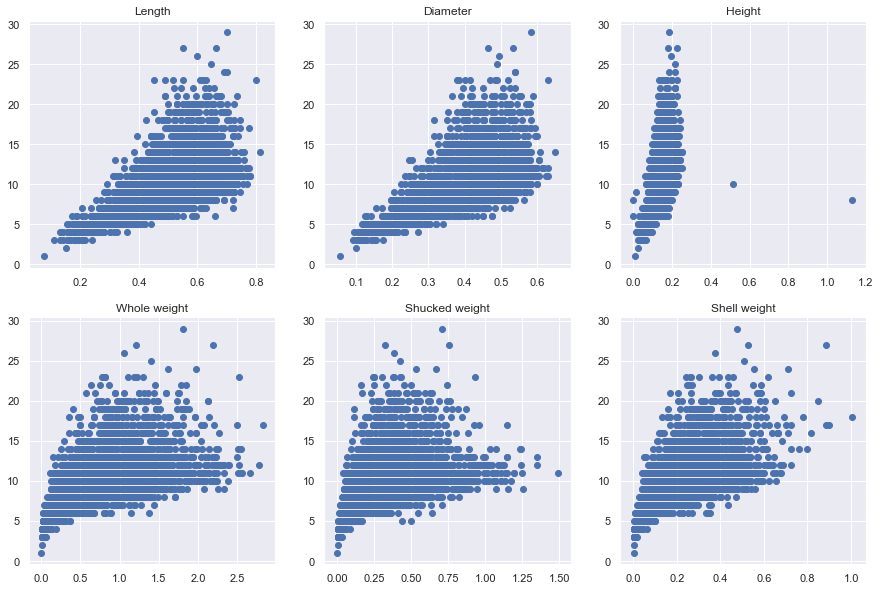

In [319]:
# show the separate relationship figures of each element with Rings
fig = plt.figure(figsize=(15,10))
i=1
for col in aba_x.columns:
    ax = fig.add_subplot(2,3,i)
    i=i+1
    plt.scatter(aba_x[col], aba_y.Rings)
    ax.set_title(aba_x[col].name)

Text(0, 0.5, 'Predictions')

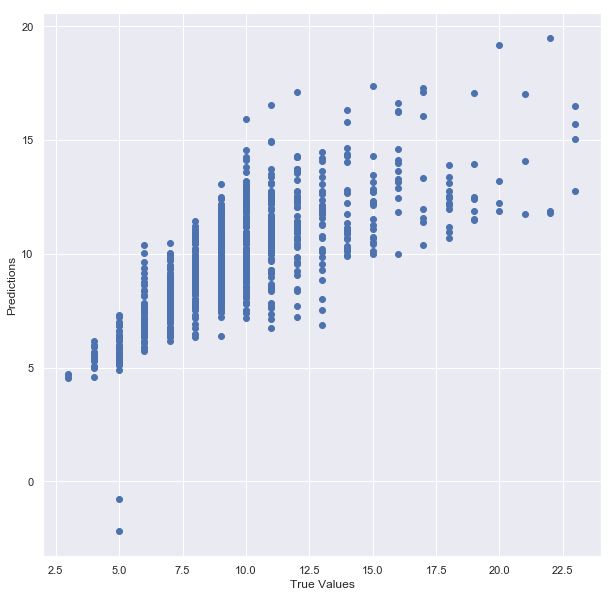

In [326]:
# instantiate the model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                        n_jobs=4)

# train
mabax_train, mabax_test, mabay_train, mabay_test = train_test_split(maba_x, maba_y, 
                                                   test_size=0.2, 
                                                   random_state=42)
fit = model.fit(mabax_train, mabay_train) 

# make predictions
mpreds = model.predict(mabax_test)
## plot predicted vs actual
plt.figure(figsize=(10,10))
plt.scatter(mabay_test, mpreds) 
plt.xlabel("True Values")
plt.ylabel("Predictions")


In [327]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(maba_x)
est = sm.OLS(maba_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     756.5
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:52:51   Log-Likelihood:                -9278.2
No. Observations:                4177   AIC:                         1.857e+04
Df Residuals:                    4170   BIC:                         1.861e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.2494      0.269     12.

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [329]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(mabay_test, mpreds)
MAE

1.659779926445652

In [330]:
#RMSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(mabay_test, mpreds)
RMSE = np.sqrt(MSE) 
RMSE

2.27506882619459

In [331]:
#R2 Score- Coefficient of Determination
from sklearn.metrics import r2_score
r2_score(mabay_test, mpreds)

0.521862565055121

### Conclusion 5
H0: "Length and Rings have linear relationship" is null hypothesis

Tool:Linear Regression

Necessary Numbers: α = 0.05, p-value = 0

Conclusion: Because the p-value is 0, so we can conclude that Length and Rings don't have linear relationship.

In [332]:
#Creating a Simple Linear Regression
r_sq = abalone[["Length", "Rings"]].corr() 
#Calculating Slope (B1)
import numpy as np
B1 = r_sq.values[0][1] * (np.std(abalone.Rings)/np.std(abalone["Length"]))
print("For 1 unit of change in Length, we can predict {} units of change in Rings".format(B1))

For 1 unit of change in Length, we can predict 14.946410917580232 units of change in Rings


In [333]:
#Calculating the Intercept
B0 = abalone.Rings.mean() - (B1 * abalone["Length"].mean())
B0

2.101883224450167

Text(0.5, 0, 'Independent Variable')

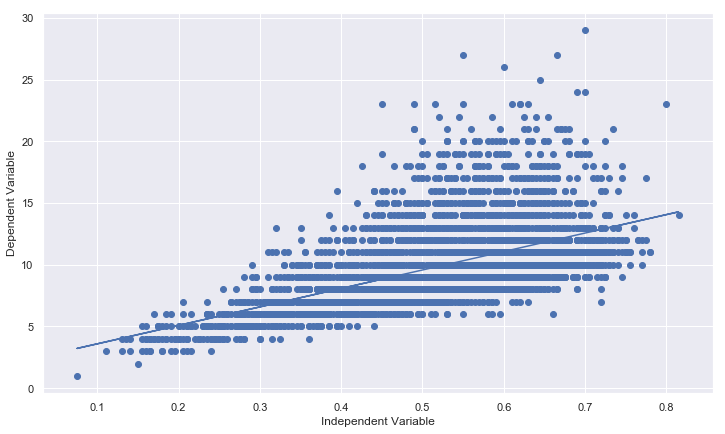

In [335]:
#Plotting the line of best fit
plt.rcParams["figure.figsize"] = (12,7)
abalone["Rings_line"] = B0 + (B1 * abalone["Length"])
plt.scatter(abalone["Length"],abalone.Rings) # create the main scatter plot
plt.plot(abalone["Length"], abalone.Rings_line) # plot the regression line
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")

In [336]:
#Split into Training and Test Sets
from sklearn.model_selection import train_test_split
aba_y = pd.DataFrame(abalone.Rings)
aba_x =pd.DataFrame(abalone["Length"])
abax_train, abax_test, abay_train, abay_test = train_test_split(aba_x, aba_y, 
                                                   test_size=0.2, 
                                                   random_state=42)

In [337]:
#Instantiating the linear model
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,
                        n_jobs=4)
fit = lr.fit(abax_train, abay_train)
#intercept
lr.intercept_

array([2.15563254])

In [338]:
#Coefficients
coef_aba = pd.DataFrame({"feature": "Length", 
                        "coeff": int(fit.coef_)},
                      index=[0])
coef_aba

,feature,coeff
0,Length,14


Text(0, 0.5, 'Predictions')

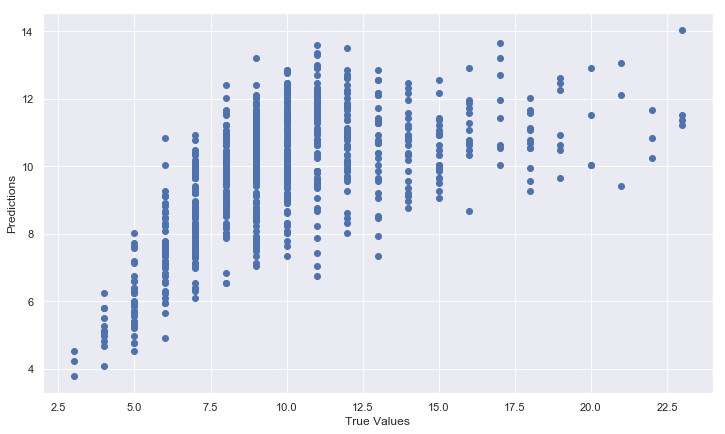

In [340]:
#Making predictions
preds = lr.predict(abax_test)

## plot predicted vs actual
plt.scatter(abay_test, preds) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

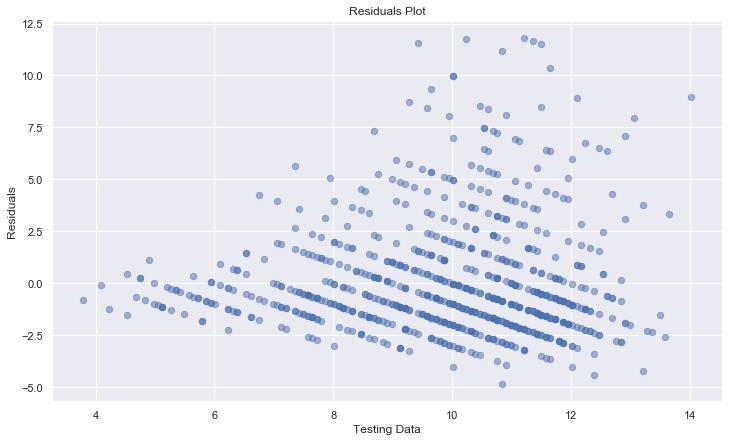

In [341]:
#Checking Random Error and plot residuals
residuals = abay_test - preds
plt.scatter(lr.predict(abax_test), residuals,
            c='b', s=40, alpha=0.5)
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [345]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(aba_x)
est = sm.OLS(aba_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1875.
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:05:42   Log-Likelihood:                -10042.
No. Observations:                4177   AIC:                         2.009e+04
Df Residuals:                    4175   BIC:                         2.010e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1019      0.186     11.328      0.0

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Conclusion 6
H0: "Length and Rings have linear relationship for Infant" is null hypothesis

Tool:Linear Regression

Necessary Numbers: α = 0.05, p-value = 0

Conclusion: Because the p-value is 0, so we can conclude that for infant, Length and Rings also don't have linear relationship.

In [231]:
aba_infant=abalone[abalone['Sex']==0]
aba_infant.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
16,0,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,7
21,0,0.380,0.275,0.100,0.2255,0.0800,0.0490,0.085,10
42,0,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.020,5


In [162]:
aba_y = pd.DataFrame(aba_infant.Rings)
aba_x =pd.DataFrame(aba_infant.Length)

In [176]:
#Creating a Simple Linear Regression
r_sq = aba_infant[["Length", "Rings"]].corr() 
r_sq

,Length,Rings
Length,1.000000,0.685997
Rings,0.685997,1.000000


In [177]:
import numpy as np
B1 = r_sq.values[0][1] * (np.std(aba_infant.Rings)/np.std(aba_infant["Length"]))
print("For 1 unit of change in Shell weight, we can predict {} units of change in Rings".format(B1))

For 1 unit of change in Shell weight, we can predict 15.827255747741006 units of change in Rings


In [178]:
B0 = aba_infant.Rings.mean() - (B1 * aba_infant["Length"].mean())
B0

1.12041821672541

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Independent Variable')

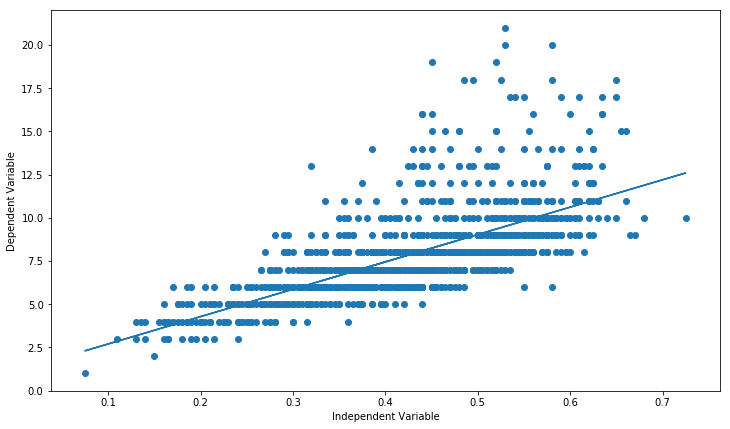

In [179]:
#Plotting the line of best fit
plt.rcParams["figure.figsize"] = (12,7)
aba_infant["Rings_infant_line"] = B0 + (B1 * aba_infant["Length"])
plt.scatter(aba_infant["Length"],aba_infant.Rings) # create the main scatter plot
plt.plot(aba_infant["Length"], aba_infant.Rings_infant_line) # plot the regression line
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")

In [180]:
#Split into Training and Test Sets
from sklearn.model_selection import train_test_split
aba_y = pd.DataFrame(aba_infant.Rings)
aba_x =pd.DataFrame(aba_infant["Length"])
abax_train, abax_test, abay_train, abay_test = train_test_split(aba_x, aba_y, 
                                                   test_size=0.2, 
                                                   random_state=42)

In [181]:
#Instantiating the linear model
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,
                        n_jobs=4)
fit = lr.fit(abax_train, abay_train)
#intercept
lr.intercept_

array([1.32012593])

In [182]:
#Coefficients
coef_aba = pd.DataFrame({"feature": "Length", 
                        "coeff": int(fit.coef_)},
                      index=[0])
coef_aba

,feature,coeff
0,Length,15


Text(0, 0.5, 'Predictions')

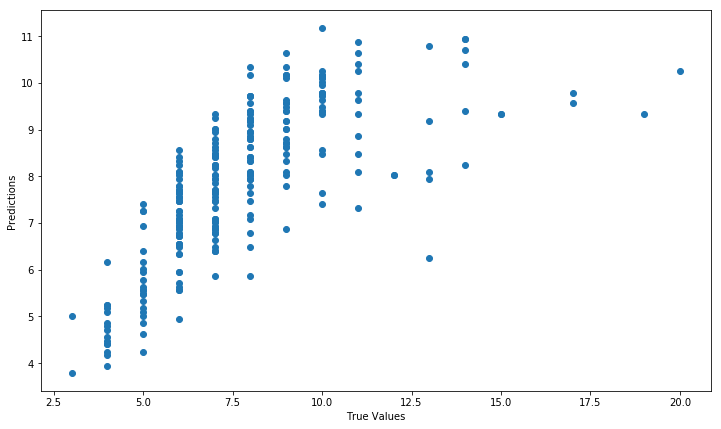

In [183]:
#Making predictions
preds = lr.predict(abax_test)

## plot predicted vs actual
plt.scatter(abay_test, preds) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

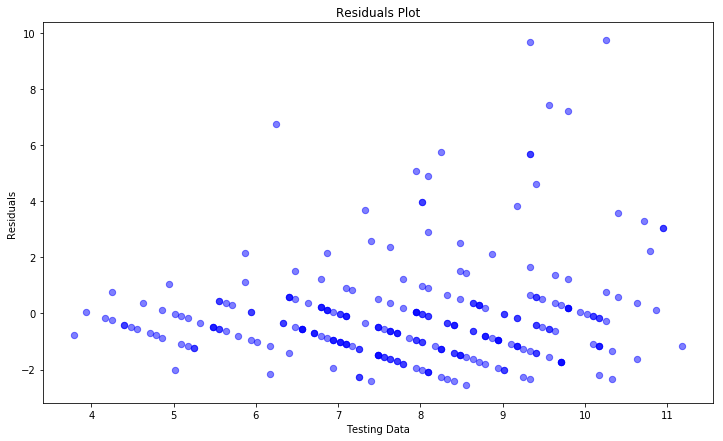

In [184]:
#Checking Random Error and plot residuals
residuals = abay_test - preds
plt.scatter(lr.predict(abax_test), residuals,
            c='b', s=40, alpha=0.5)
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [185]:
#Examine error 
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(abay_test, preds)
MAE

1.2358831316738832

In [186]:
#RMSE

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(abay_test, preds)
RMSE = np.sqrt(MSE) 
RMSE

1.8710425508670898

In [187]:
#R2 Score- Coefficient of Determination
from sklearn.metrics import r2_score
r2_score(abay_test, preds)

0.48992951587230327

In [188]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(aba_x)
est = sm.OLS(aba_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     1191.
Date:                Sun, 18 Aug 2019   Prob (F-statistic):          2.76e-187
Time:                        08:52:22   Log-Likelihood:                -2712.8
No. Observations:                1342   AIC:                             5430.
Df Residuals:                    1340   BIC:                             5440.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1204      0.202      5.535      0.0

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Conclusion 7
H0: "Height for infant is Gaussian distribution" is null hypothesis 

Tool: QQ plot, normaltest

Necessary Numbers: α = 0.05, p-value = 0.5639596947723188

Conclusion: Because the p-value is larger than α, so we can conclude that Height for infant is Gaussian distribution.

In [348]:
aba_infant=abalone[abalone['Sex']==0]
aba_infant.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Shell weight,Rings,Rings_cat
4,0,0.330,0.255,0.080,0.2050,0.0895,0.055,7,0-10
5,0,0.425,0.300,0.095,0.3515,0.1410,0.120,8,0-10
16,0,0.355,0.280,0.085,0.2905,0.0950,0.115,7,0-10
21,0,0.380,0.275,0.100,0.2255,0.0800,0.085,10,0-10
42,0,0.240,0.175,0.045,0.0700,0.0315,0.020,5,0-10


In [357]:
aba_out=pd.DataFrame(aba_infant[aba_infant.columns[0:7]])
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
df_minmax_array = min_max_scaler.fit_transform(aba_out)
df_minmax = pd.DataFrame(df_minmax_array, columns=aba_out.columns)
df_minmax.head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Shell weight
0,0.0,0.392308,0.404040,0.363636,0.099145,0.114563,0.081867
1,0.0,0.538462,0.494949,0.431818,0.170696,0.181230,0.181331
2,0.0,0.430769,0.454545,0.386364,0.140904,0.121683,0.173680
3,0.0,0.469231,0.444444,0.454545,0.109158,0.102265,0.127774
4,0.0,0.253846,0.242424,0.204545,0.033211,0.039482,0.028309


((array([-3.28145241, -3.02252307, -2.87842386, ...,  2.87842386,
          3.02252307,  3.28145241]),
  array([0.        , 0.        , 0.04545455, ..., 0.90909091, 0.97727273,
         1.        ])),
 (0.14545930511996755, 0.49088876845955837, 0.9984134390096688))

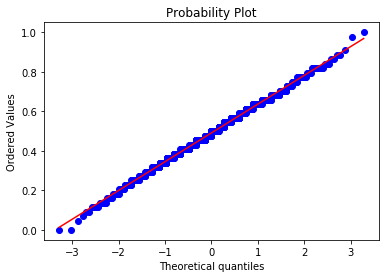

In [360]:
# in QQ plot, it looks Gaussian

stats.probplot(df_minmax["Height"], dist="norm", plot=plt)

In [358]:
from scipy.stats import normaltest
from sklearn import datasets
k2_stat, p = normaltest(df_minmax["Height"])
print(df_minmax["Length"].name,":K^2 Stat= {}, Pvalue= {}".format(k2_stat, p))
alpha = 0.05 
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Length :K^2 Stat= 1.145544986414679, Pvalue= 0.5639596947723188
Sample looks Gaussian (fail to reject H0)
